In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from unicodedata import normalize

%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
file_path = './datasus_tidy.pkl'
uf_json = './siglas_uf.json'

In [3]:
palette = 'Blues_d'

tick_size = 13
legend_size = 14
label_size = 16
title_size = 18
fig_size = (12,6)

In [4]:
def format_milhar(y, _):
    return format(int(y), ',').replace(',', '.')

def format_decimal(y, _):
    return '{:#.3f}'.format(float(y)).replace('.', ',')

remover_acentos = lambda text: normalize('NFD', str(text)).encode('ascii', 'ignore').decode('utf-8')

def format_relatorio(n_valid, n_total):
    s = f'Observações válidas: {n_valid}/{n_total} ({100*n_valid/n_total:.2f}%)'
    return s

In [5]:
data = pd.read_pickle(file_path, compression='zip')

In [6]:
data = data[data.CircunstanciaObito.isin(['Acidente', 'Homicídio'])]

In [7]:
data.columns

Index(['DataObito', 'Naturalidade', 'DataNascimento', 'CausaBasica', 'Sexo',
       'RacaCor', 'EstadoCivil', 'Escolaridade', 'Ocupacao',
       'LocalOcorrenciaObito', 'QtdeFilhosVivos', 'QtdeFilhosMortos',
       'GravidezMultiplicidade', 'DuracaoGestacao', 'TipoParto', 'ObitoParto',
       'ObitoGravidez', 'ObitoPuerperio', 'AssistenciaMedica', 'Exame',
       'Cirurgia', 'Necropsia', 'CircunstanciaObito', 'AcidenteTrabalho',
       'FonteInformacao', 'HoraObito', 'InvestigacaoObito',
       'DataInvestigacaoObito', 'FonteInvestigacaoObito', 'CRMResponsavel',
       'IdadeHoras', 'IdadeDias', 'IdadeMeses', 'IdadeAnos',
       'NomeMunicipioResidencia', 'UFMunicipioResidencia',
       'LatitudeMunicipioResidencia', 'LongitudeMunicipioResidencia',
       'AltitudeMunicipioResidencia', 'AreaMunicipioResidencia'],
      dtype='object')

***

**Qual a maior causa de mortes no trânsito?**

Observações válidas: 387361/387361 (100.00%)


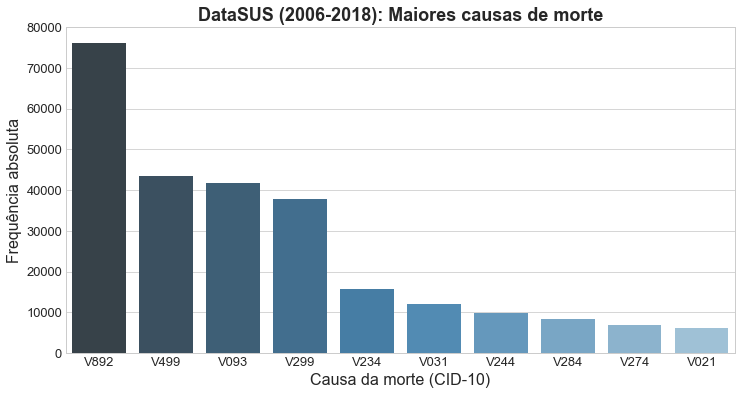

In [8]:
print(format_relatorio(data.CausaBasica.notna().sum(), data.shape[0]))

fig, ax = plt.subplots(figsize=fig_size)

ax.set_title('DataSUS (2006-2018): Maiores causas de morte', fontsize=title_size, fontweight='bold')

sns.countplot(x='CausaBasica', data=data, palette=palette,
              order=data.CausaBasica.value_counts().head(10).index, ax=ax)

ax.set_ylabel('Frequência absoluta', fontsize=label_size)
ax.set_xlabel('Causa da morte (CID-10)', fontsize=label_size)
ax.tick_params(labelsize=tick_size)

plt.show()

**Qual a idade de quem morre no trânsito no Brasil?**

In [9]:
data['IdadeObito'] = (data.DataObito - data.DataNascimento).divide(np.timedelta64(1,'Y'))

Observações válidas: 383570/387361 (99.02%)


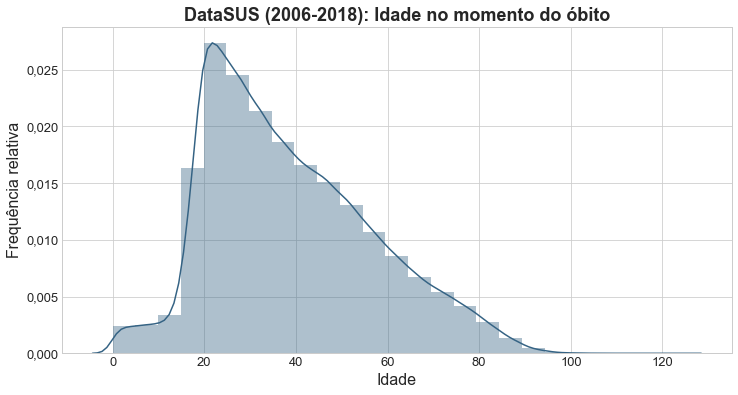

In [10]:
print(format_relatorio(data.IdadeObito.notna().sum(), data.shape[0]))

fig, ax = plt.subplots(figsize=fig_size)

ax.set_title('DataSUS (2006-2018): Idade no momento do óbito', fontsize=title_size, fontweight='bold')

sns.distplot(a=data['IdadeObito'].dropna(), bins=25,
             color=sns.color_palette(palette)[1], ax=ax)

ax.set_ylabel('Frequência relativa', fontsize=label_size)
ax.set_xlabel('Idade', fontsize=label_size)
ax.tick_params(labelsize=tick_size)
ax.yaxis.set_major_formatter(FuncFormatter(format_decimal))

plt.show()

Observações válidas: 383570/387361 (99.02%)


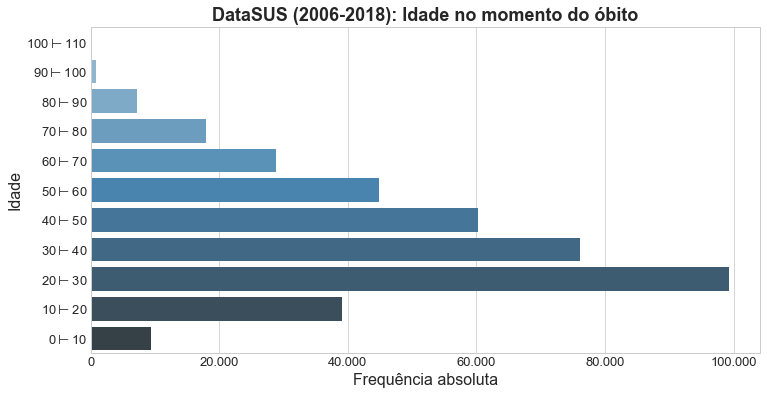

In [11]:
edges = list(range(0, int(round(data['IdadeObito'].max(), -1)), 10))
labels = [str(edge) + r'$\vdash$' +str(edge+10) for edge in edges[:-1]]

print(format_relatorio(data.IdadeObito.notna().sum(), data.shape[0]))

fig, ax = plt.subplots(figsize=fig_size)

ax.set_title('DataSUS (2006-2018): Idade no momento do óbito', fontsize=title_size, fontweight='bold')

sns.countplot(y=pd.cut(data['IdadeObito'], bins=edges, labels=labels), palette=palette)

ax.invert_yaxis()
ax.set_xlabel('Frequência absoluta', fontsize=label_size)
ax.set_ylabel('Idade', fontsize=label_size)
ax.tick_params(labelsize=tick_size)
ax.xaxis.set_major_formatter(FuncFormatter(format_milhar))

plt.show()

**Quantas pessoas morreram a cada ano?**

Observações válidas: 387361/387361 (100.00%)


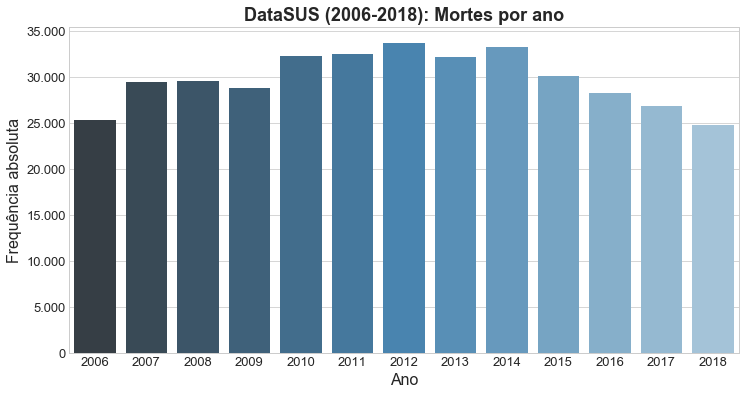

In [12]:
print(format_relatorio(data.DataObito.notna().sum(), data.shape[0]))

fig, ax = plt.subplots(figsize=fig_size)
ax.set_title('DataSUS (2006-2018): Mortes por ano', fontsize=title_size, fontweight='bold')

sns.countplot(x=data.DataObito.dt.year, palette=palette)

ax.set_ylabel('Frequência absoluta', fontsize=label_size)
ax.set_xlabel('Ano', fontsize=label_size)
ax.tick_params(labelsize=tick_size)
ax.yaxis.set_major_formatter(FuncFormatter(format_milhar))

plt.show()

**De que gêneros são as vítimas de trânsito?**

Observações válidas: 387179/387361 (99.95%)


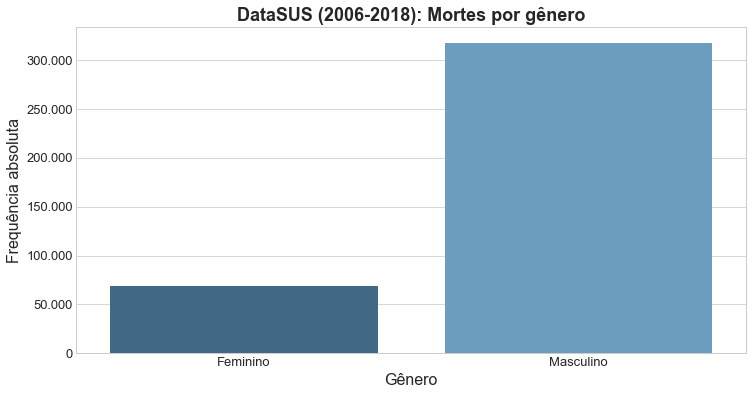

In [13]:
print(format_relatorio(data.Sexo.notna().sum(), data.shape[0]))

fig, ax = plt.subplots(figsize=fig_size)

ax.set_title('DataSUS (2006-2018): Mortes por gênero', fontsize=title_size, fontweight='bold')

sns.countplot(x="Sexo", data=data, palette=palette, ax=ax)

ax.set_ylabel('Frequência absoluta', fontsize=label_size)
ax.set_xlabel('Gênero', fontsize=label_size)
ax.tick_params(labelsize=tick_size)
ax.yaxis.set_major_formatter(FuncFormatter(format_milhar))

plt.show()

**De que etnias são essas vítimas?**

Observações válidas: 372153/387361 (96.07%)


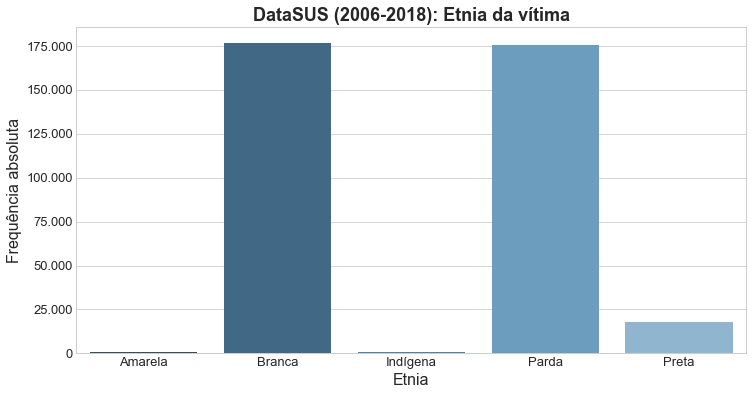

In [14]:
print(format_relatorio(data.RacaCor.notna().sum(), data.shape[0]))

fig, ax = plt.subplots(figsize=fig_size)

ax.set_title('DataSUS (2006-2018): Etnia da vítima', fontsize=title_size, fontweight='bold')

sns.countplot(x="RacaCor", data=data, palette=palette, ax=ax,
              order=sorted(data.RacaCor.unique().categories.tolist()))

ax.set_ylabel('Frequência absoluta', fontsize=label_size)
ax.set_xlabel('Etnia', fontsize=label_size)
ax.tick_params(labelsize=tick_size)
ax.yaxis.set_major_formatter(FuncFormatter(format_milhar))

plt.show()

**Quantas dessa vítimas tinham assistência médica?**

Observações válidas: 217758/387361 (56.22%)


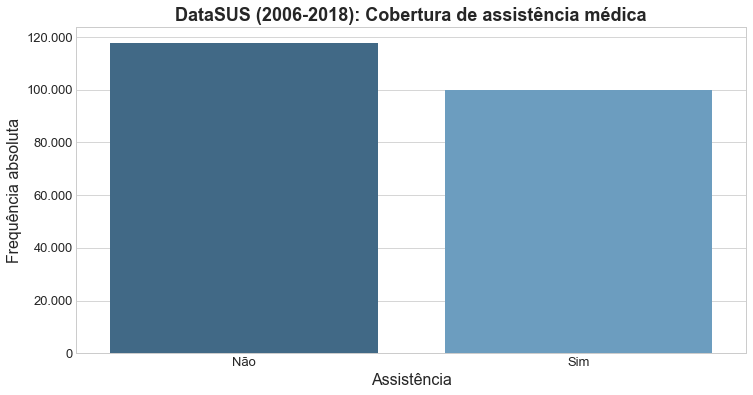

In [15]:
print(format_relatorio(data.AssistenciaMedica.notna().sum(), data.shape[0]))

fig, ax = plt.subplots(figsize=fig_size)

ax.set_title('DataSUS (2006-2018): Cobertura de assistência médica', fontsize=title_size, fontweight='bold')

sns.countplot(x="AssistenciaMedica", data=data, palette=palette, ax=ax)

ax.set_ylabel('Frequência absoluta', fontsize=label_size)
ax.set_xlabel('Assistência', fontsize=label_size)
ax.tick_params(labelsize=tick_size)
ax.yaxis.set_major_formatter(FuncFormatter(format_milhar))

plt.show()

**Qual a escolaridade das vítimas?**

Observações válidas: 267997/387361 (69.19%)


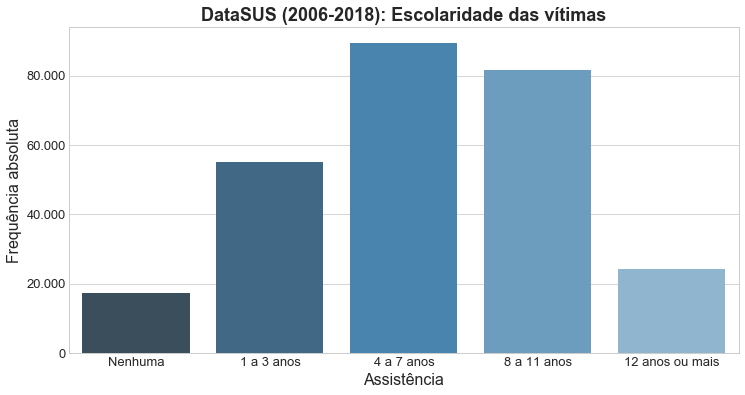

In [16]:
print(format_relatorio(data.Escolaridade.notna().sum(), data.shape[0]))

fig, ax = plt.subplots(figsize=fig_size)

ax.set_title('DataSUS (2006-2018): Escolaridade das vítimas', fontsize=title_size, fontweight='bold')

order = ['Nenhuma', '1 a 3 anos', '4 a 7 anos', '8 a 11 anos', '12 anos ou mais']

sns.countplot(x="Escolaridade", data=data, palette=palette, order=order, ax=ax)

ax.set_ylabel('Frequência absoluta', fontsize=label_size)
ax.set_xlabel('Assistência', fontsize=label_size)
ax.tick_params(labelsize=tick_size)
ax.yaxis.set_major_formatter(FuncFormatter(format_milhar))

plt.show()

**Em que estados residiam essas vítimas?**

In [17]:
with open(uf_json, 'r') as file:
    uf_mapper = json.loads(file.read())

data['UFMunicipioResidencia'] = data.UFMunicipioResidencia.apply(remover_acentos).str.title().map(uf_mapper)

Observações válidas: 381506/387361 (98.49%)


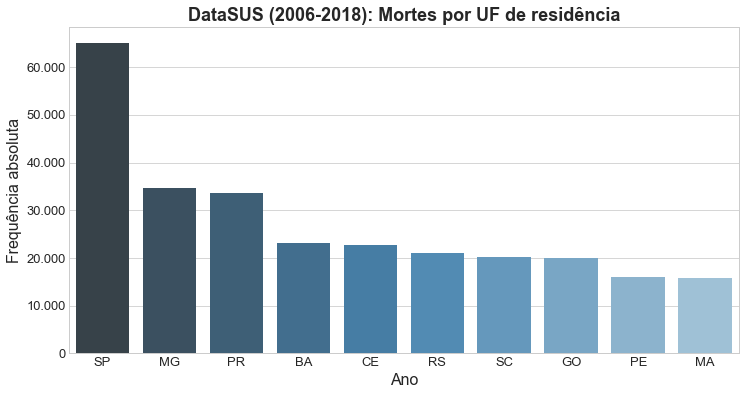

In [18]:
print(format_relatorio(data.UFMunicipioResidencia.notna().sum(), data.shape[0]))

fig, ax = plt.subplots(figsize=fig_size)
ax.set_title('DataSUS (2006-2018): Mortes por UF de residência', fontsize=title_size, fontweight='bold')

sns.countplot(x=data.UFMunicipioResidencia, palette=palette, ax=ax,
              order=data.UFMunicipioResidencia.value_counts().head(10).index)

ax.set_ylabel('Frequência absoluta', fontsize=label_size)
ax.set_xlabel('Ano', fontsize=label_size)
ax.tick_params(labelsize=tick_size)
ax.yaxis.set_major_formatter(FuncFormatter(format_milhar))

plt.show()

***

Observações válidas: 387179/387361 (99.95%)


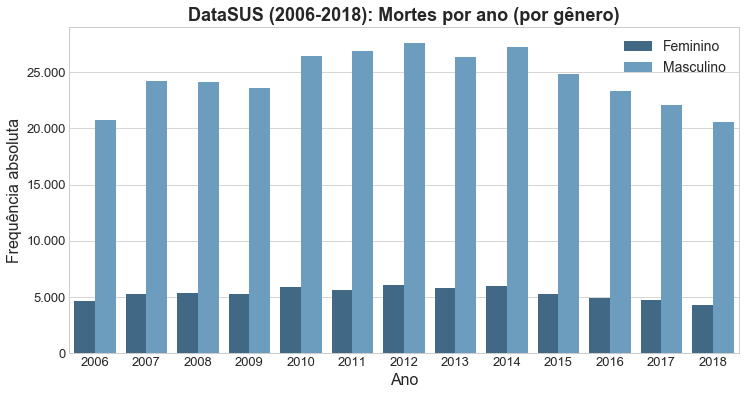

In [19]:
print(format_relatorio((data.Sexo.notna() & data.DataObito.notna()).sum(), data.shape[0]))

fig, ax = plt.subplots(figsize=fig_size)
ax.set_title('DataSUS (2006-2018): Mortes por ano (por gênero)', fontsize=title_size, fontweight='bold')

sns.countplot(x=data.DataObito.dt.year, palette=palette, hue=data.Sexo, ax=ax)

ax.set_ylabel('Frequência absoluta', fontsize=label_size)
ax.set_xlabel('Ano', fontsize=label_size)
ax.tick_params(labelsize=tick_size)
ax.yaxis.set_major_formatter(FuncFormatter(format_milhar))
ax.legend(prop={'size': legend_size})

plt.show()

Observações válidas: 383532/387361 (99.01%)


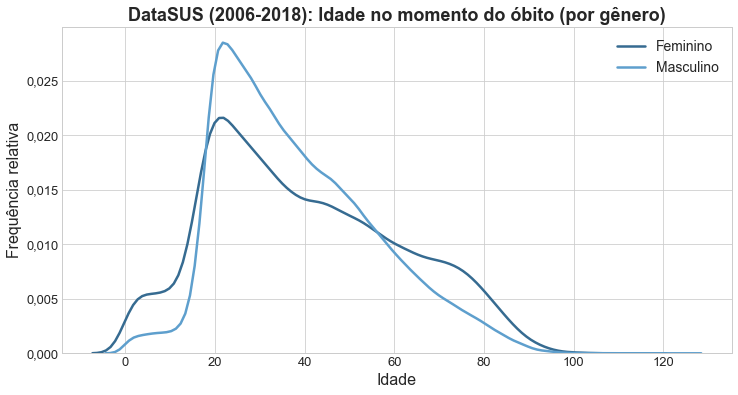

In [20]:
print(format_relatorio((data.Sexo.notna() & data.IdadeObito.notna()).sum(), data.shape[0]))

fig, ax = plt.subplots(figsize=fig_size)

ax.set_title('DataSUS (2006-2018): Idade no momento do óbito (por gênero)', fontsize=title_size, fontweight='bold')

g = sns.FacetGrid(data, hue="Sexo", palette=palette)
_ = g.map(sns.distplot, "IdadeObito", hist=False, ax=ax, kde_kws=dict(linewidth=2.5))
plt.close()

ax.set_ylabel('Frequência relativa', fontsize=label_size)
ax.set_xlabel('Idade', fontsize=label_size)
ax.tick_params(labelsize=tick_size)
ax.yaxis.set_major_formatter(FuncFormatter(format_decimal))

ax.legend(prop={'size': legend_size})
plt.show()

Observações válidas: 211989/387361 (54.73%)


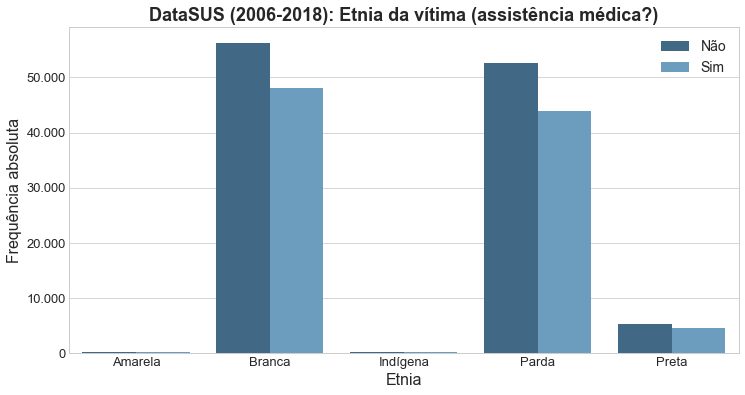

In [21]:
print(format_relatorio((data.RacaCor.notna() & data.AssistenciaMedica.notna()).sum(), data.shape[0]))

fig, ax = plt.subplots(figsize=fig_size)

ax.set_title('DataSUS (2006-2018): Etnia da vítima (assistência médica?)', fontsize=title_size, fontweight='bold')

sns.countplot(x='RacaCor', data=data, palette=palette, ax=ax, hue='AssistenciaMedica',
              order=sorted(data.RacaCor.unique().categories.tolist()))

ax.set_ylabel('Frequência absoluta', fontsize=label_size)
ax.set_xlabel('Etnia', fontsize=label_size)
ax.tick_params(labelsize=tick_size)
ax.yaxis.set_major_formatter(FuncFormatter(format_milhar))

ax.legend(prop={'size': legend_size})

plt.show()

***

Observações válidas: 383532/387361 (99.01%)


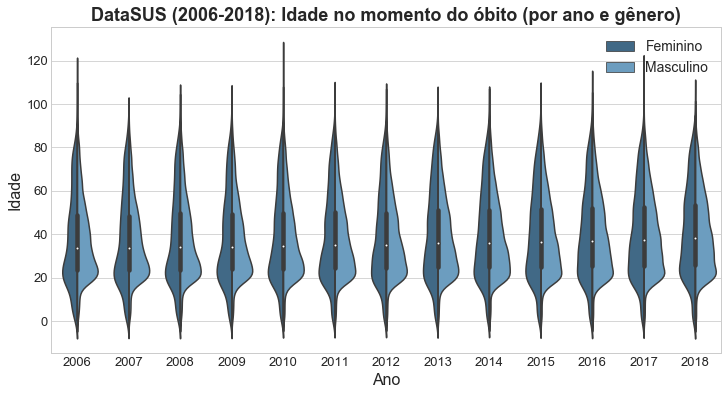

In [22]:
print(format_relatorio((data.Sexo.notna() & data.DataObito.notna() & data.IdadeObito.notna()).sum(), data.shape[0]))

fig, ax = plt.subplots(figsize=fig_size)

ax.set_title('DataSUS (2006-2018): Idade no momento do óbito (por ano e gênero)', fontsize=title_size, fontweight='bold')

sns.violinplot(x=data.DataObito.dt.year, y=data.IdadeObito, hue=data.Sexo, split=True, palette=palette, ax=ax)

ax.set_ylabel('Idade', fontsize=label_size)
ax.set_xlabel('Ano', fontsize=label_size)
ax.tick_params(labelsize=tick_size)
ax.legend(prop={'size': legend_size})

plt.show()